In [1]:
from google.colab import drive
import os
import os.path
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /content/drive


In [2]:
path = "/content/drive/My Drive/USAccidents"
os.chdir(path)
os.listdir()
US_dataset = pd.read_csv("US_Accidents_June20.csv") 


In [3]:
US_dataset.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
US_dataset.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


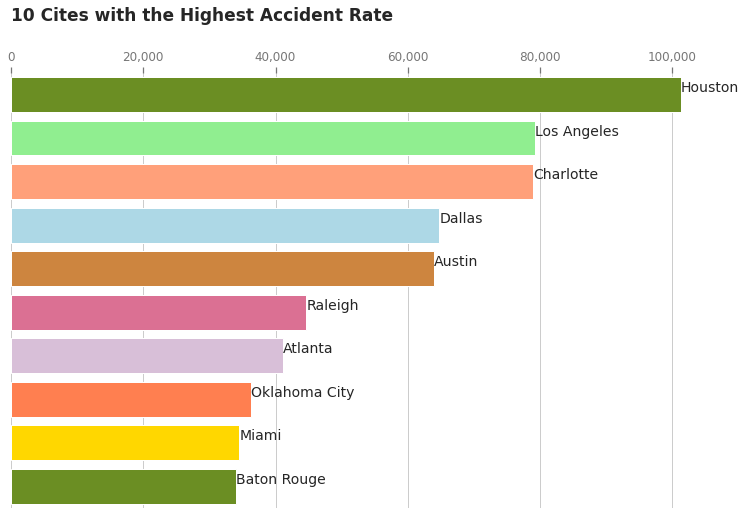

In [5]:

df_st = US_dataset.groupby('City').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]
df_st = df_st[::-1]   

colors = ['olivedrab', 'gold', 'coral', 'thistle',
     'palevioletred', 'peru', 'lightblue', 'lightsalmon', 'lightgreen']

fig, ax=plt.subplots(figsize=(12,8))
ax.barh(df_st['City'], df_st['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_st['Counts'], df_st['City'])):
        ax.text(value, i,     name,           size=14, va='bottom')
        
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, '10 Cites with the Highest Accident Rate',
            transform=ax.transAxes, size=17, weight=600, ha='left')
plt.box(False)

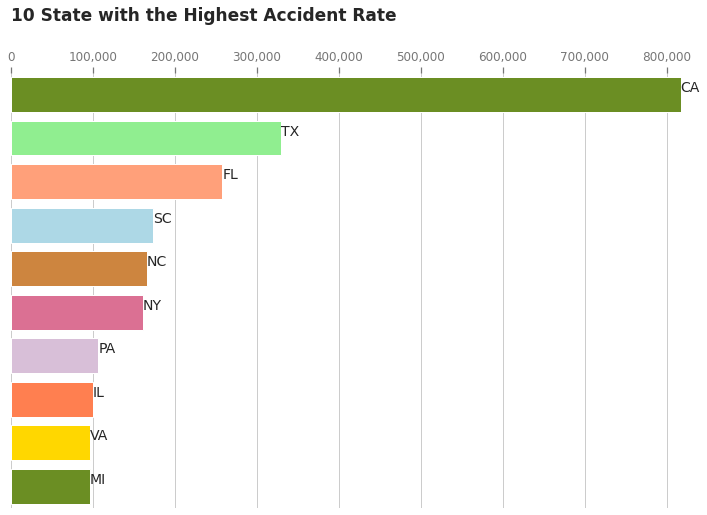

In [6]:

df_st = US_dataset.groupby('State').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]
df_st = df_st[::-1]   

fig, ax=plt.subplots(figsize=(12,8))
ax.barh(df_st['State'], df_st['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_st['Counts'], df_st['State'])):
        ax.text(value, i,     name,           size=14, va='bottom')
        
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, '10 State with the Highest Accident Rate',
            transform=ax.transAxes, size=17, weight=600, ha='left')
plt.box(False)

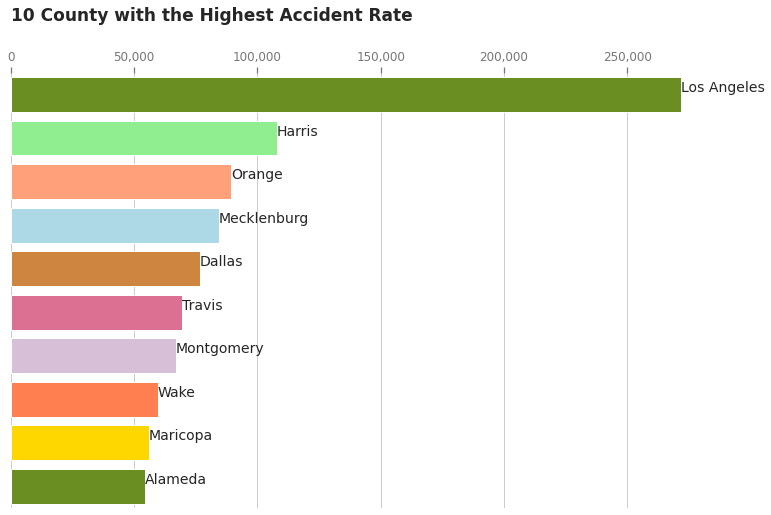

In [7]:

df_st = US_dataset.groupby('County').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]
df_st = df_st[::-1]   

fig, ax=plt.subplots(figsize=(12,8))
ax.barh(df_st['County'], df_st['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_st['Counts'], df_st['County'])):
        ax.text(value, i,     name,           size=14, va='bottom')
        
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, '10 County with the Highest Accident Rate',
            transform=ax.transAxes, size=17, weight=600, ha='left')
plt.box(False)

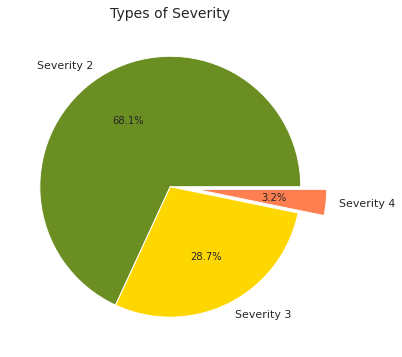

In [8]:
colors = ['olivedrab', 'gold', 'coral']
US_sev = US_dataset.groupby('Severity').size()
US_sev = US_sev[[2,3,4]]
cases = ['Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(US_sev,
        colors = colors,
        labels= cases,
        explode = (0,0,0.2), 
        autopct = ('%1.1f%%')) 

plt.title('Types of Severity', fontsize=14);

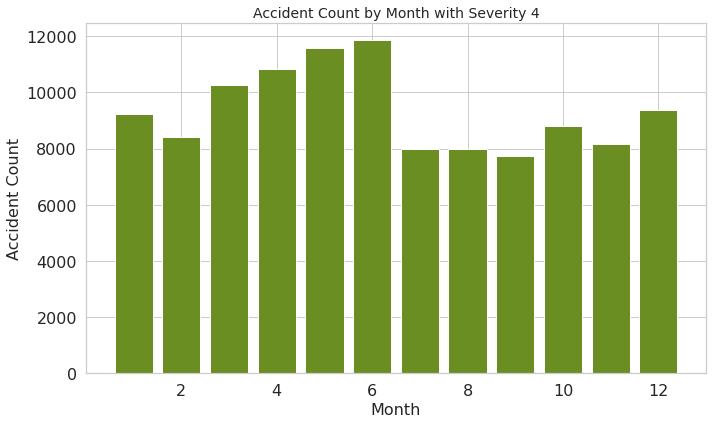

In [9]:
US_dataset['time'] = pd.to_datetime(US_dataset.Start_Time, format='%Y-%m-%d %H:%M:%S')
colors = ['olivedrab']
plt.figure(figsize=(10,6))
plt.hist(pd.DatetimeIndex(US_dataset.loc[US_dataset["Severity"] == 4]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8, color = colors)
plt.title("Accident Count by Month with Severity 4" , fontsize=14)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Accident Count", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

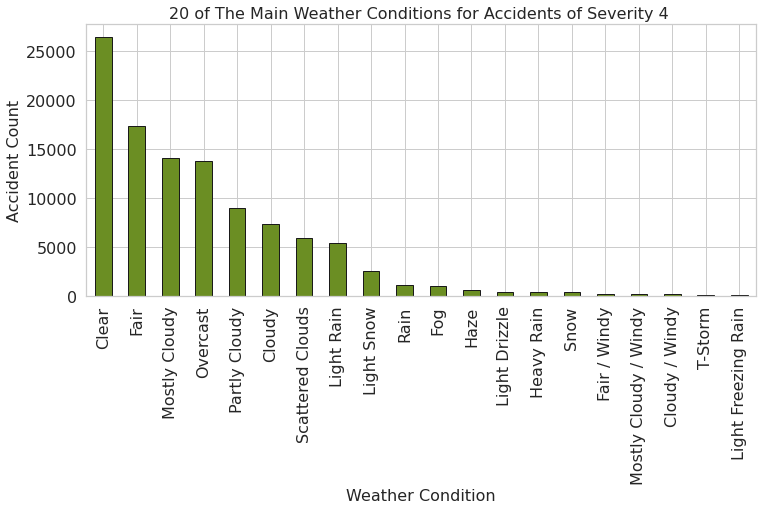

In [10]:
plt.subplots(figsize=(12,5))
US_dataset.loc[US_dataset["Severity"] == 4]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,color=colors)
plt.xlabel('Weather Condition',fontsize=16)
plt.ylabel('Accident Count',fontsize=16)
plt.title('20 of The Main Weather Conditions for Accidents of Severity 4 ',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


In [11]:
dataSeverity = US_dataset.sample(n=10000)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = dataSeverity['Start_Lng'],
        lat = dataSeverity['Start_Lat'],
        text = dataSeverity['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = dataSeverity['Severity'].max(),
        color = dataSeverity['Severity'],
        cmax = 1,
            colorbar_title="Severity"
        )))

fig.update_layout(
        title = 'Severity of the Accidents in US from 2016-2020',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

In [12]:
US_dataset.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [13]:
US_dataset = US_dataset.drop(['Source','Sunrise_Sunset','TMC','Timezone','Description','Weather_Timestamp','Number','Zipcode', 'Country', 'Airport_Code','Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight','ID'], axis=1)

In [14]:
US_dataset= US_dataset.dropna(subset=['City'])

In [15]:
US_dataset['Junction']=US_dataset['Junction'].astype(int)
US_dataset['Crossing']=US_dataset['Crossing'].astype(int)
US_dataset['Traffic_Signal']=US_dataset['Traffic_Signal'].astype(int)
US_dataset['Amenity']=US_dataset['Amenity'].astype(int)
US_dataset['Bump']=US_dataset['Bump'].astype(int)
US_dataset['Give_Way']=US_dataset['Give_Way'].astype(int)
US_dataset['No_Exit']=US_dataset['No_Exit'].astype(int)
US_dataset['Railway']=US_dataset['Railway'].astype(int)
US_dataset['Roundabout']=US_dataset['Roundabout'].astype(int)
US_dataset['Station']=US_dataset['Station'].astype(int)
US_dataset['Stop']=US_dataset['Stop'].astype(int)
US_dataset['Traffic_Calming']=US_dataset['Traffic_Calming'].astype(int)
US_dataset['Turning_Loop']=US_dataset['Turning_Loop'].astype(int)

In [16]:
# Replace missing values using median 
median = US_dataset['End_Lat'].median()
US_dataset['End_Lat'].fillna(median, inplace=True)

median = US_dataset['Temperature(F)'].median()
US_dataset['Temperature(F)'].fillna(median, inplace=True)

median = US_dataset['Wind_Chill(F)'].median()
US_dataset['Wind_Chill(F)'].fillna(median, inplace=True)

median = US_dataset['Humidity(%)'].median()
US_dataset['Humidity(%)'].fillna(median, inplace=True)

median = US_dataset['Pressure(in)'].median()
US_dataset['Pressure(in)'].fillna(median, inplace=True)

median = US_dataset['Visibility(mi)'].median()
US_dataset['Visibility(mi)'].fillna(median, inplace=True)

median = US_dataset['Wind_Speed(mph)'].median()
US_dataset['Wind_Speed(mph)'].fillna(median, inplace=True)

median = US_dataset['Precipitation(in)'].median()
US_dataset['Precipitation(in)'].fillna(median, inplace=True)

median = US_dataset['End_Lng'].median()
US_dataset['End_Lng'].fillna(median, inplace=True)

In [17]:
#delete rows that contains one accident 
order=pd.value_counts(US_dataset['County'])
order
print(order[order == 1].index)



Index(['Gregory', 'Deer Lodge', 'Menifee', 'Traverse', 'Lynn', 'San Augustine',
       'Upton', 'Little River', 'Jack', 'Mcminn', 'Sharp', 'Woods', 'Maries',
       'McDonald', 'Republic', 'Newport News City', 'McMullen', 'Harlan',
       'Waynesboro City', 'Dunklin', 'Refugio', 'Oglala Lakota', 'Sunflower',
       'Dickey', 'McCreary', 'Big Stone', 'Buena Vista City', 'Dixon',
       'Musselshell', 'Letcher', 'Fleming', 'Jim Hogg', 'Slope', 'Ness',
       'Dundy', 'Real', 'Glascock', 'Towns', 'Runnels', 'Spink', 'Howell',
       'Nuckolls', 'Quitman', 'Coryell', 'Dickens', 'Alger', 'Burleigh',
       'Doniphan', 'Graves', 'Charles Mix', 'Hand', 'Hyde', 'McKenzie',
       'Cowley', 'Dewitt', 'Rains', 'Cottle', 'Dawes', 'Loving', 'Gaines',
       'Ontonagon', 'Gentry', 'Saint James', 'Yancey', 'Kearney', 'Mclean',
       'Mellette', 'Haskell', 'Frontier', 'Merrick', 'Hanson', 'Coffey',
       'Nantucket', 'Gove', 'Brewster', 'Estill', 'McCulloch'],
      dtype='object')


In [18]:


indexNames = US_dataset[ US_dataset['County'] == 'Doniphan' ].index
# Delete these row indexes from dataFrame
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Cowley' ].index
# Delete these row indexes from dataFrame
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Fleming' ].index
# Delete these row indexes from dataFrame
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Mellette' ].index
# Delete these row indexes from dataFrame
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Towns' ].index
# Delete these row indexes from dataFrame
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Jack' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Letcher' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Gove' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Nantucket' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Sharp' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Upton' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'McMullen' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Republic' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Loving' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Charles Mix' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'McKenzie' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Gaines' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Quitman' ].index
US_dataset.drop(indexNames , inplace=True)


indexNames = US_dataset[ US_dataset['County'] == 'Slope' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Mclean' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Ness' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'McCulloch' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Hanson' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dundy' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Graves' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Lynn' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'McDonald' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dunklin' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Saint James' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Maries' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Frontier' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Harlan' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Little River' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Runnels' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Cottle' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Jim Hogg' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Gentry' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Real' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dixon' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Burleigh' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Merrick' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dawes' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dewitt' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Howell' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Newport News City' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Ontonagon' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Woods' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Big Stone' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Sunflower' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Oglala Lakota' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dickey' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Estill' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Musselshell' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Waynesboro City' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Hand' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Coffey' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Alger' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Traverse' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Haskell' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Coryell' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Buena Vista City' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Yancey' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Refugio' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Gregory' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'McCreary' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Glascock' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Nuckolls' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Mcminn' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Menifee' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Dickens' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Rains' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Spink' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'San Augustine' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Hyde' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Kearney' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Deer Lodge' ].index
US_dataset.drop(indexNames , inplace=True)

indexNames = US_dataset[ US_dataset['County'] == 'Brewster' ].index
US_dataset.drop(indexNames , inplace=True)

In [19]:
#Converting the giving time data into workable Date-time objects
US_dataset['Start_Time']=pd.to_datetime(US_dataset['Start_Time'],infer_datetime_format=True)

#Breaking the start end time into usable independant features 
US_dataset['Year'] = US_dataset['Start_Time'].dt.year
US_dataset['Month'] = US_dataset['Start_Time'].dt.month
US_dataset['Day'] = US_dataset['Start_Time'].dt.day
US_dataset['Time_S'] = US_dataset['Start_Time'].dt.hour
US_dataset['Weekday']=US_dataset['Start_Time'].dt.weekday
US_dataset.drop(columns=['Start_Time','End_Time'],axis=1,inplace=True) # supurfluous now

In [20]:
#Define bins for time (24 hour time) 
timeBins=[-1,6,12,18,24]
tBin_names=['Early Morning','Morning','Afternoon','Evening']
US_dataset['TimeofDay']=pd.cut(US_dataset['Time_S'],timeBins,labels=tBin_names)


In [21]:
#Define bins for Season (Months) 
seasonBins=[-1,2,5,8,11,12]
sBin_names=['Winter','Spring','Summer','Autumn','Winter']
US_dataset['Season']=pd.cut(US_dataset['Month'],seasonBins,labels=sBin_names,ordered=False)


In [22]:
#Define bins for Day_type -1(Mon) to 4(Fri),4(Fri)-6(Sun)
seasonBins=[-1,4,6]
sBin_names=['Weekday','Weekend']
US_dataset['Day_Type']=pd.cut(US_dataset['Weekday'],seasonBins,labels=sBin_names,ordered=False)
US_dataset.tail(5)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,time,Year,Month,Day,Time_S,Weekday,TimeofDay,Season,Day_Type
3513612,2,34.00248,-117.37936,33.99888,-117.37094,0.543,Pomona Fwy E,R,Riverside,Riverside,CA,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-08-23 18:03:25,2019,8,23,18,4,Afternoon,Summer,Weekday
3513613,2,32.76696,-117.14806,32.76555,-117.15363,0.338,I-8 W,R,San Diego,San Diego,CA,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-08-23 19:11:30,2019,8,23,19,4,Evening,Summer,Weekday
3513614,2,33.77545,-117.84779,33.77740,-117.85727,0.561,Garden Grove Fwy,R,Orange,Orange,CA,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,2019-08-23 19:00:21,2019,8,23,19,4,Evening,Summer,Weekday
3513615,2,33.99246,-118.40302,33.98311,-118.39565,0.772,San Diego Fwy S,R,Culver City,Los Angeles,CA,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-08-23 19:00:21,2019,8,23,19,4,Evening,Summer,Weekday
3513616,2,34.13393,-117.23092,34.13736,-117.23934,0.537,CA-210 W,R,Highland,San Bernardino,CA,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-08-23 18:52:06,2019,8,23,18,4,Afternoon,Summer,Weekday


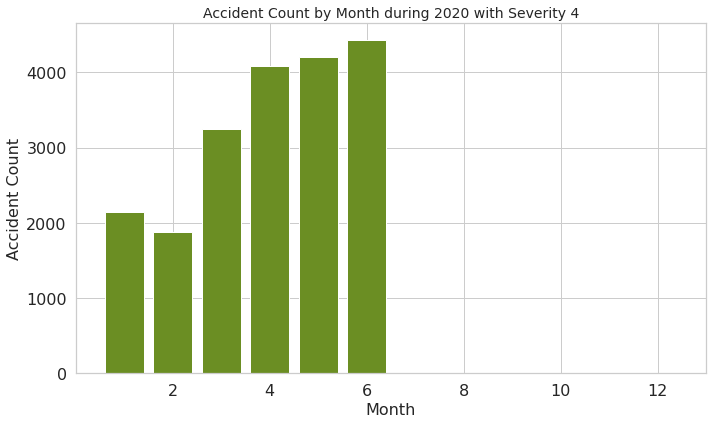

In [23]:
colors = ['olivedrab']
plt.figure(figsize=(10,6))
rslt_df = US_dataset.loc[US_dataset["Year"]==2020] 
plt.hist(pd.DatetimeIndex(rslt_df.loc[rslt_df["Severity"] == 4]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8, color = colors)
plt.title("Accident Count by Month during 2020 with Severity 4" , fontsize=14)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Accident Count", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
import re
import collections
# the 40 most common words
st_type =' '.join(US_dataset['Street'].unique().tolist()) 
st_type = re.split(" |-", st_type) 
st_type = [x[0] for x in collections.Counter(st_type).most_common(40)] 
print('the 40 most common street')
print(*st_type, sep = ", ") 

#plot this shorouq

the 40 most common street
Rd, , Dr, St, Ave, N, S, E, W, Ln, Blvd, Highway, Way, Ct, State, Hwy, NE, Pkwy, SW, Pl, SE, NW, Road, Old, Cir, Route, US, Creek, Hill, Park, County, Lake, Trl, Valley, Ridge, Mill, River, Pike, Oak, Ter


In [25]:

# converting type of columns to 'category'
US_dataset['Day_Type'] = US_dataset['Day_Type'].astype('category')
US_dataset['City'] = US_dataset['City'].astype('category')
US_dataset['County'] = US_dataset['County'].astype('category')
US_dataset['State'] = US_dataset['State'].astype('category')
US_dataset['Wind_Direction'] = US_dataset['Wind_Direction'].astype('category')
US_dataset['Weather_Condition'] = US_dataset['Weather_Condition'].astype('category')
US_dataset['Street'] = US_dataset['Street'].astype('category')
US_dataset['Side'] = US_dataset['Side'].astype('category')
US_dataset['TimeofDay'] = US_dataset['TimeofDay'].astype('category')
US_dataset['Season'] = US_dataset['Season'].astype('category')

US_dataset["Day_Type"] = US_dataset["Day_Type"].cat.codes
US_dataset["City"] = US_dataset["City"].cat.codes
US_dataset["Weather_Condition"] = US_dataset["Weather_Condition"].cat.codes
US_dataset["Wind_Direction"] = US_dataset["Wind_Direction"].cat.codes
US_dataset["State"] = US_dataset["State"].cat.codes
US_dataset["County"] = US_dataset["County"].cat.codes
US_dataset["Street"] = US_dataset["Street"].cat.codes
US_dataset["Season"] = US_dataset["Season"].cat.codes
US_dataset["TimeofDay"] = US_dataset["TimeofDay"].cat.codes
US_dataset["Side"] = US_dataset["Side"].cat.codes


In [26]:
#Convert severity feature to '1' and '0'
US_dataset['NewSeverity'] = 0
US_dataset.loc[US_dataset['Severity'] == 4, 'NewSeverity'] = 1
US_dataset.NewSeverity.value_counts()

0    3401151
1     112277
Name: NewSeverity, dtype: int64

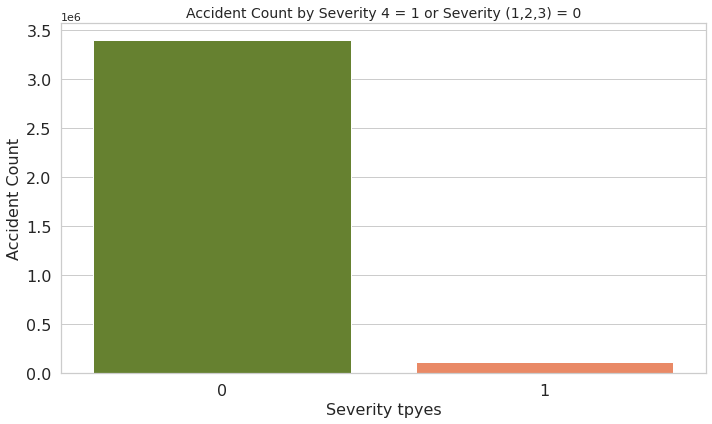

In [27]:
colors = ['olivedrab', 'coral']
plt.figure(figsize=(10,6))
sns.countplot(x = US_dataset['NewSeverity'], palette=colors)
plt.title("Accident Count by Severity 4 = 1 or Severity (1,2,3) = 0" , fontsize=14)
plt.xlabel("Severity tpyes", fontsize=16)
plt.ylabel("Accident Count", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
US_dataset = US_dataset.drop(['Severity'], axis = 1)
US_dataset2 = pd.concat([US_dataset[US_dataset['NewSeverity']==1].sample(100000, replace = True),
                   US_dataset[US_dataset['NewSeverity']==0].sample(100000)], axis=0)


In [29]:
#US_dataset2 = US_dataset2.drop(['time'], axis=1)
US_dataset = US_dataset.drop(['time'], axis=1)

In [30]:

US_dataset2 = pd.concat([US_dataset[US_dataset['NewSeverity']==1].sample(40000, replace = True), US_dataset[US_dataset['NewSeverity']==0].sample(40000)], axis=0)

X = US_dataset2.drop('NewSeverity', axis=1)
y = US_dataset2['NewSeverity']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)


log_model = LogisticRegression(max_iter=10000,random_state=42)
log_model.fit(X_train, y_train)

accuracy_train = log_model.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = log_model.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))
y_pred = log_model.predict(X_test)


Train Accuracy: 79.0%
Test Accuracy: 79.2%


In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7919375
Precision: 0.8109951845906902
Recall: 0.7598696578518611
F1: 0.7846004529278551


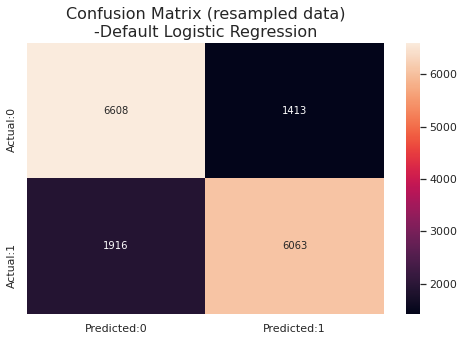

In [32]:
confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred,
                           labels=[1])
conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d').set_title(
    "Confusion Matrix (resampled data)\n-Default Logistic Regression", fontsize=16)
plt.show()

In [33]:
#Random Forest Model 
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

rfc_model = RandomForestClassifier(**parameters)
rfc_model.fit(X_train, y_train)
RF_predictions = rfc_model.predict(X_test)
score = accuracy_score(y_test ,RF_predictions)
print("Accuracy:", score)

Accuracy: 0.8841875


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, RF_predictions))
print("Precision:",metrics.precision_score(y_test, RF_predictions))
print("Recall:",metrics.recall_score(y_test, RF_predictions))
print("F1:",metrics.f1_score(y_test, RF_predictions))

Accuracy: 0.8841875
Precision: 0.8484641638225257
Recall: 0.9347035969419727
F1: 0.8894984793368717


In [35]:

svc_model = svm.SVC(kernel='linear') # Linear Kernel
svc_model.fit(X_train, y_train)
SVMy_pred = svc_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, SVMy_pred))


Accuracy: 0.8105625


In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, SVMy_pred))
print("Precision:",metrics.precision_score(y_test, SVMy_pred))
print("Recall:",metrics.recall_score(y_test, SVMy_pred))
print("F1:",metrics.f1_score(y_test, SVMy_pred))

Accuracy: 0.8105625
Precision: 0.8456272701872032
Recall: 0.7586163679659105
F1: 0.79976217216093


In [37]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(12, activation='relu', input_shape=(40,)))

model2.add(Dense(8, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

In [38]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model2.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
64000/64000 [==============================] - 109s 2ms/step - loss: 0.3519 - accuracy: 0.8484
Epoch 2/20
64000/64000 [==============================] - 109s 2ms/step - loss: 0.3084 - accuracy: 0.8717
Epoch 3/20
64000/64000 [==============================] - 108s 2ms/step - loss: 0.3013 - accuracy: 0.8737
Epoch 4/20
64000/64000 [==============================] - 107s 2ms/step - loss: 0.2968 - accuracy: 0.8757
Epoch 5/20
64000/64000 [==============================] - 107s 2ms/step - loss: 0.2928 - accuracy: 0.8775
Epoch 6/20
64000/64000 [==============================] - 108s 2ms/step - loss: 0.2917 - accuracy: 0.8790
Epoch 7/20
64000/64000 [==============================] - 107s 2ms/step - loss: 0.2892 - accuracy: 0.8798
Epoch 8/20
64000/64000 [==============================] - 106s 2ms/step - loss: 0.2872 - accuracy: 0.8802
Epoch 9/20
64000/64000 [==============================] - 108s 2ms/step - loss: 0.2862 - accuracy: 0.8811
Epoch 10/20
64000/64000 [=====================

In [39]:
score = model2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
a = score[1]

Test loss: 0.2853984534740448 / Test accuracy: 0.8818749785423279


In [40]:
nnpredict = model2.predict(X_test)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, nnpredict.round()))
print("Precision:",metrics.precision_score(y_test, nnpredict.round()))
print("Recall:",metrics.recall_score(y_test, nnpredict.round()))
print("F1:",metrics.f1_score(y_test, nnpredict.round()))

Accuracy: 0.881875
Precision: 0.8631754741739234
Recall: 0.9068805614738689
F1: 0.8844884488448844
